In [3]:
from aqua import Reader,catalogue, inspect_catalogue
import sys
sys.path.append("../")
import ocean_circulation_func as fn

FDB5 binary library not present on system, disabling FDB support.


In [4]:
# Here we load the EN4 observations
reader = Reader(model='EN4',exp='en4',source='monthly')
den4=reader.retrieve()
den4=den4.rename({"depth":"lev"}) # To standardise the name for the vertical dimension
den4=den4[["ocpt","so"]]
den4_yearly=den4.resample(time="Y").mean()
den4_monthly=den4.resample(time="M").mean()

In [5]:
# Here we load the data of a model (chosen from the catalog as an example )
reader = Reader(model='FESOM', exp='tco2559-ng5-cycle3', source="lra-r100-monthly")
dmod = reader.retrieve()

dmod=dmod.rename({"nz1":"lev"}) # To standardise the name for the vertical dimension
dmod=dmod[["ocpt","so"]]

dmod_yearly=dmod.resample(time="Y").mean() # We compute 
dmod_monthly=dmod.resample(time="M").mean()

In [6]:
# Here we compute the regional average of temperature and salinity in the Labrador Sea region (other regions can be selected/defined) 
dmod_yearly_ls_mean=fn.weighted_area_mean(dmod_yearly,50, 65, 300, 325) # In the model (yearly)
den4_yearly_ls_mean=fn.weighted_area_mean(den4_yearly,50, 65, 300, 325) # In the obs (yearly)
dmod_monthly_ls_mean=fn.weighted_area_mean(dmod_monthly,50, 65, 300, 325) # In the model (monthly)
den4_monthly_ls_mean=fn.weighted_area_mean(den4_monthly,50, 65, 300, 325) # In the obs (monthly)

In [7]:
# Here we compute the density values (referred to the surface level, sigma0)
rho_t_s_labrador_mod_yl= fn.convert_variables(dmod_yearly_ls_mean) # In the model (yearly)
rho_t_s_labrador_en4_yl= fn.convert_variables(den4_yearly_ls_mean) # In the obs (yearly)
rho_t_s_labrador_mod_ml= fn.convert_variables(dmod_monthly_ls_mean) # In the model (monthly)
rho_t_s_labrador_en4_ml= fn.convert_variables(den4_monthly_ls_mean) # In the obs (monthly)

In [8]:
#fn.plot_strat_obs_1mod(converted_labrador_sea_mean, "Labrador Sea")

array([207.42545 , 184.69746 , 235.38617 ,  15.07854 ,  45.44776 ,
        15.07854 ,  15.07854 ,  15.07854 ,  15.07854 ,  15.07854 ,
        35.27829 ,  45.44776 ,  45.44776 ,  15.07854 ,  35.27829 ,
        15.07854 ,  25.16046 ,  15.07854 ,  15.07854 ,  15.07854 ,
        15.07854 ,  25.16046 ,  15.07854 ,  15.07854 ,  15.07854 ,
        15.07854 ,  15.07854 ,  15.07854 ,  15.07854 ,  15.07854 ,
        15.07854 ,  15.07854 ,  15.07854 ,  25.16046 ,  35.27829 ,
        87.27029 ,  25.16046 ,  15.07854 ,  15.07854 ,  15.07854 ,
        15.07854 ,  15.07854 ,  15.07854 ,  15.07854 ,  15.07854 ,
        45.44776 ,  15.07854 ,  15.07854 , 109.806175,  25.16046 ,
        55.691494,  25.16046 ,  25.16046 ,  15.07854 ,  15.07854 ,
        15.07854 ,  15.07854 ,  15.07854 ,  15.07854 ,  45.44776 ,
        76.54591 ,  45.44776 ,  15.07854 ,  15.07854 ,  15.07854 ,
        15.07854 ,  15.07854 ,  15.07854 ,  25.16046 ,  25.16046 ,
        25.16046 , 121.9519  , 121.9519  ,  98.31118 ,  98.311

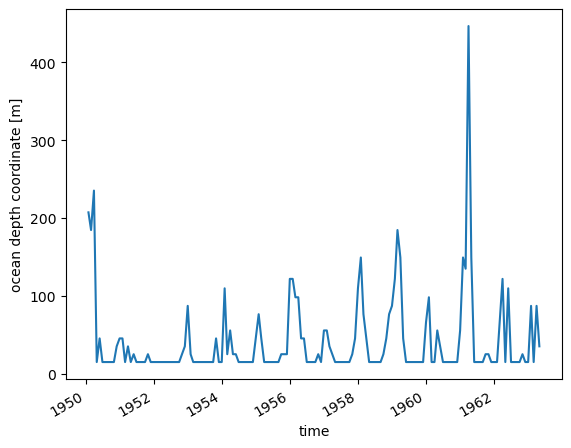

In [9]:
mld_en4=fn.compute_mld_cont_monthly(rho_t_s_labrador_en4_ml.rho[0:160,])
mld_mod=fn.compute_mld_cont_monthly(rho_t_s_labrador_mod_ml.rho)

mld_en4.plot()
mld_en4.values
##mld_mod.time
##mld_mod.values


[15.07854 25.16046 15.07854]
[ 5.0215898 15.07854    5.0215898]
[0.04678194 0.04969123 0.09049397]
[-0.04585958  0.05267179 -0.08870978]
[[       nan 0.04678194        nan        nan        nan 0.06010825
  0.09551612 0.0858027  0.15227429 0.13106733 0.16793526 0.19192813
  0.22837308 0.18953172 0.23477602 0.27223168 0.25814696 0.28925556
  0.32891769 0.32268789 0.34782358 0.37041945 0.39059219 0.40429091
  0.41920708 0.43313852 0.44773625 0.45884155 0.47833273 0.49530043
  0.51258097 0.53286639 0.54767933 0.560613   0.57733063 0.59155142
  0.5963888  0.60003997 0.59840311        nan        nan        nan]
 [       nan 0.05267179 0.04969123 0.06767114 0.10212764 0.16660163
  0.21441157 0.2308586  0.28813111 0.27965564 0.31107178 0.33463472
  0.37262258 0.31370957 0.34513928 0.40439485 0.37565257 0.39636402
  0.44024105 0.42935998 0.44302516 0.46217475 0.48155404 0.49389149
  0.50871601 0.52283288 0.53798506 0.54893259 0.56729688 0.58660881
  0.60446267 0.62411418 0.63926125 0.65226163 

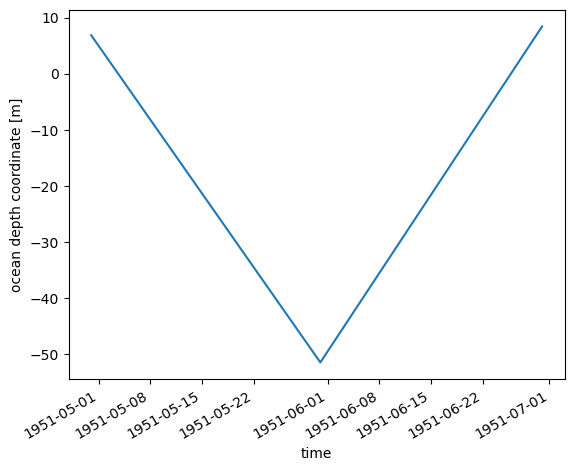

In [40]:
# Here we compute MLD from monthly density fields
import numpy as np
def compute_mld2(rho):
    """To compute the mixed layer depth from density fields 
    Parameters
    ----------
    rho : xarray.DataArray for sigma0, dims must be time, space, depth (must be in metres)
    Returns
    -------
    mld: xarray.DataArray, dims of time, space
    
      ll
      
    """
    mld=rho
    

    # Here we identify the last level before 10m
    slevs=rho.lev
    ilev0=0


    for ilev in range(len(slevs)):   
     tlev = slevs[ilev]
     if tlev<= 10.: slev10=ilev
    

    # And we take the last level before 10m  as our sigma0 surface reference
    surf_dens = rho.interp(lev=10)
 #   surf_ref = (rho[:,slev10]+rho[:,slev10+1])/2
 #   print(surf_dens.values)
 #   print(rho[:,slev10].values)
 #   print(surf_ref.values)
    
    

    # We compute the density difference between surface and whole field
    dens_diff = rho-surf_dens
        
    ##print(surf_dens.values)
    ##print(dens_diff.values)
    # keep density differences exceeding threshold, discard other values
    dens_diff2 = dens_diff.where(dens_diff > 0.03)   ### The threshold in de Boyer Montegut (2004)

    # We determine the level at which the threshold is exceeded by the minimum margin
    cutoff_lev=dens_diff2.lev.where(dens_diff2==dens_diff2.min(["lev"])).max(["lev"]) 
    cutoff_lev3=dens_diff2.lev[np.isfinite(dens_diff2.lev)][0]
    cutoff_lev4=np.isfinite(dens_diff2[:,:])
    cutoff_lev5=np.isfinite(dens_diff2[:,:])[:,0]
    #cutoff_lev6=dens_diff2.lev[np.isfinite(dens_diff2[:,:])[:,0]]

    # As well as the previous level
    cutoff_lev_m1=dens_diff2.lev.where(dens_diff2.lev < cutoff_lev).max(["lev"])
    # The MLD is established by interpolating to the 0.03 diff between the two points
    rdif_m1=dens_diff.where(dens_diff.lev==cutoff_lev_m1).max(["lev"])  #rho diff in first lev
    rdif=dens_diff.where(dens_diff.lev==cutoff_lev).max(["lev"]) # rho diff in second lev
    mld=cutoff_lev_m1+((cutoff_lev-cutoff_lev_m1)*(rdif-0.03)/(rdif-rdif_m1))
    mld=mld.rename("mld")
    #print(kk.values)
    print(cutoff_lev.values)
    print(cutoff_lev_m1.values)
    print(rdif.values)
    print(rdif_m1.values)
    print(dens_diff2.values)
    print(mld.values)
    print(cutoff_lev4.values)
    print(cutoff_lev5.values)
#    print(dens_diff2)
#    print(mld2.values)
    
    # compute water depth
    # note: pressure.lev, cthetao.lev, and abs_salinity.lev are identical
#    test = sigma0.isel(time=0) + sigma0.lev
#    bottom_depth = (
#        pressure.lev.where(test == test.max(dim="lev"))
#        .max(dim="lev")
#        .rename("bottom_depth")
#    )  # units 'meters'

    # set MLD to water depth where MLD is NaN
#    mld = mld.where(~np.isnan(mld), bottom_depth)

    return mld
mld_tm=compute_mld2(rho_t_s_labrador_en4_ml.rho[15:18,])
#rho_t_s_labrador_en4_ml.rho[0:6,].plot()
#print(rho_t_s_labrador_en4_ml.rho[0:6,])
mld_tm.plot()#mld_tm=fn.compute_mld(dmod_yearly_ls_mean)
